# Temat: Prosty perceptron jako przykład klasyfikaotra binarnego
## Autor: Piotr Biskup


### 1.Wprowadzenie

W ujeciu matematycznym można analiować koncepcję **perceptronu** (sztucznego neuronu) jako zadanie klasyfikcji binarnej, w której odnosimy się do dwóch klas:
* 1 klasa pozytywna
* -1 klasa negatywna
Następnie definujemy **funkcję decyzyjną** $\phi(z)$, na którą składa się kombinacja liniowa określonych wartości wejściowych $x$ oraz powiązanego z nim wektora wag $w$, gdzie $z$ nosi nazwę
całkowitego pobudzenia ukłdu</br>
$(z = w_{1}x_{1} + \dots + w_{m}*x_{m})$:

$$
w =
\left[ \begin{array}{c}
w_{1} \\
\vdots \\
w_{m} 
\end{array} \right],
x =
\left[ \begin{array}{c}
x_{1} \\
\vdots \\
x_{m} 
\end{array} \right]
$$

Jeżli całkowite pobudzenie z danej próbki $x^{(i)}$ jest wyższe od zdefiniowanej wartości progowej $\theta$, to przewidujemy, że dany obiekt należy do klasy pozytywnej 1, w przeciwnym wypadku do klasy negatywnej -1. W algorytmie perceptronu funkcja decyzyjna $\phi$ stanowi odmianę **funkcji skoku jednostkowego**:
$$
\phi(z) = \left\{ \begin{array}{ll}
1 & \textrm{gdy $z \geq \theta$}\\
-1 & \textrm{gdy $z<\theta$}\\
\end{array} \right.
$$

Możemy dla uproszczenia przenieść wartość progową $\theta$ na lewą stronę równania i zdefiniować początkową wagę jako $w_{0} = -\theta$ a $x_{0} = 1$, dzieki czemu całkowite pobudzenie $z$ będzie miało prostsza postać:

$$
z = w_{0}x_{0} + w_{1}x_{1} + \dots +w_{m}x_{m} =w^Tx
$$

przy założeniu, że 
$$
\phi(z) = \left\{ \begin{array}{ll}
1 & \textrm{gdy $z \geq 0$}\\
-1 & \textrm{gdy $z<0$}\\
\end{array} \right.
$$

Próg ujemny, czyli waga $w_{0} = -\theta$, jest zazwyczaj nazywany **obciążeniem jednostkowym**.

### 2.Reguła uczenia preceptronu.

Podstawowym założniem modelu preceptronu progowego jest wprowadzenie uproszczonego mechanizmu naśladującego działąnie pojedynczej komórki newowej: albo ostanie uaktywniona albo nie.
Z tego powodu reguła uczenia perceptronu nie jest skomplikowana i można ja opisać następującymi etapami:
* Wprowadź wagi o wartości 0 lub niewielkich, losowych wartośicach.
* Dla każdej próbki uczączej $x^(i)$:
    1. Oblicz wartosć wyjściową $\widehat{y}$
    2. Zaktualizuj wagi

W tym przypadku wartością wyjsciową jest etykieta klasy przewidziana przez wcześniej zdefiniowaną funkcje skoku jednostkowego, a równoczesną aktualizacje wagi $w_{j}$ w wektorze wag $w$ można zapisac w bardziej formalny sposób: 
$$
w_{j} := \Delta w_{j}
$$

Służąca do aktualizowania wagi $w_{j}$ wartość $w_{j}$ jest wyliczana za pomocą reguły uczenia perceptronu:
$$
\Delta w_{j} = \eta(y^{(i)} - \widehat{y}^{(i)})x^{(i)}_{j}
$$

gdzie $\eta$ jest współczynnikiem uczenia oraz $\eta \in [0,1]$, $y^{(i)}$ stanowi rzeczyiwstą etykietę klas $i$-tej próbki uczącej, natomiast $\widehat{y}^{(i)}$ to przewidywana etykieta klas. Bardzo istotna jest informacja, że wszystkie wagi w wektorze wag są jednocześnie aktualizowane, co oznacza, że nie możemy ponownie przeliczyć wartości $\widehat{y}^{(i)}$, dopóki nie zaktualizujemy wszystkich wag.<\br>
Zapis aktualizacji dla dwuwymiarowego zbioru danych możemy zdefiniować następujaco:
$$
\Delta w_{0} = \eta(y^{(i)} - wyjście^{(i)} \\
\Delta w_{1} = \eta(y^{(i)} - wyjście^{(i)})x^{(i)}_{1} \\
\Delta w_{2} = \eta(y^{(i)} - wyjście^{(i)})x^{(i)}_{2}
$$

Zobaczmy na przykładzie jak prosty jest to model uczenia. W przypadku prawidłowego przewidywania etykiety klas wagi zostają niezmienione:
$$
\Delta w_{j} = \eta(-1 - (-1))x^{(i)}_{j} = 0 \\
\Delta w_{j} = \eta(1 - 1)x^{(i)}_{j} = 0 
$$

Jednak w przypadku nieprawidowego prognozowania wagi zostają przesunięte w kierunku pozytywnej lub negatywnej klasy docelowej:

$$
\Delta w_{j} = \eta(1 - (-1))x^{(i)}_{j} = \eta*2*x^{(i)}_{j} \\
\Delta w_{j} = \eta(-1 - 1)x^{(i)}_{j} = \eta*(-2)*x^{(i)}_{j} 
$$

Aby lepiej zrozumiec koncepcję mnożnika $x^{(i)}_{j}$, przyjrzyjmy się kolejnemu przykładow, w którym:
$$
y^{(i)} = 1, \widehat{y}^{(i)} = -1, \eta = 1
$$

Załóżmy, że $x^{(i)}_{j} = 0.5$, a my tę próbkę nieprawidłowo sklasyfikowaliśmy jako -1. W takim przypadku wagę zwiększamy o 1, przez co całkowite pobudzenie $x^{(i)}_{j} \circ w_{j}$ będzie silniejsze w sytuacji ponownego natrafienia na tę próbkę, dzięki czemu z większym prawdopodobieństwem zostanie przekoczona wartość graniczna funkcji skokowej, a badany obiekt zostanie sklasyfikowany jako 1:
$$
\Delta w^{(i)}_{j} = 1*(1-(-1))*0.5 = 2*0.5 = 1
$$
Aktualizacja wagi jest wprost proporcjonalna do wartości $x^{(i)}_{j}$. Załóżmy, że mamy kolejną próbkę $x^{(i)}_{j} = 2$, która została nieprawidłowo sklasyfikowana jako -1. W tej sytuacji pzesuwamy granicę decyzyjną w jeszcze większym stopniu po to, zby próbka została następnym razem właściwie sklasyfikowana:
$$
\Delta w_{j} = 1*(1 - (-1))*2 = 2*2 = 4
$$

Jeżeli nie można oddzielić dwóch klas za pomocą linii granicy decyzyjnej, możemy ustalić maksymalną liczbę przebiegów uczenia (**epok**) algorytmu z wykorzystaniem danych uczących, ponieważ inaczej aktualizowalibyśmy wagi w nieskończoność.

### 3. Implementacja

Teraz przejdziemy do implementacji opisanego algorytmu. Przeprowadzimy klasyfikację na przykładzie danych irys.data
![tekst alternatywny](https://miro.medium.com/max/1100/0*SHhnoaaIm36pc1bd)

Dane składają sie z 150 próbek oraz 3 rodzajów irysów. Każda próbka składa się z 4 cech (długość działki, szerokość działki, długość płatka, szerokość płatka)
W naszym przyapdku jest to klasyfikator binarny więc ograniczymy się do 100 próbek, które będą się składać z 2 klas:
* iris - setosa
* iris - versicolor
oraz ograniczymy sie też do dwóch cech, aby można było pokazać je na wykresie (dwuwymiarowym):
* długość działki
* długość płatka

Na początek wczytamy dane z pliku 'irys.data', który zawiera nasze dane:


In [3]:
import csv
data = []
counter = 0
with open('iris.data') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
       data.append(row)
       counter+=1
       if counter == 100:
            break


Ponieważ nasze dane są w wersji tekstowej, musimy je zamienić na wartości zmiennoprzecinkowe

In [4]:
for i in range(100):
    for j in range(4):
        data[i][j] = float(data[i][j])
        

Następnie musimy zamienić etykiety dla kazdej próbki na wartość liczbową. Przyjmiemy dla ułatwienia, że:
* Iris-Setosa = 1
* Iris-Versicolor = -1
Wypiszmy kilka pierwszych danych oraz jedną dalszą żeby zobaczyć też inną klasę próbki:

In [5]:
for i in range(10):
    print("{0}: {1}".format(i, data[i]))
print("{0}: {1}".format(80, data[80]))

0: [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']
1: [4.9, 3.0, 1.4, 0.2, 'Iris-setosa']
2: [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']
3: [4.6, 3.1, 1.5, 0.2, 'Iris-setosa']
4: [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']
5: [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']
6: [4.6, 3.4, 1.4, 0.3, 'Iris-setosa']
7: [5.0, 3.4, 1.5, 0.2, 'Iris-setosa']
8: [4.4, 2.9, 1.4, 0.2, 'Iris-setosa']
9: [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']
80: [5.5, 2.4, 3.8, 1.1, 'Iris-versicolor']


Następnie zapiszmy do zmiennej listowej y przekonwertowane etykiety za pomocą list-comprehension:

In [6]:
y = [1 if x[4] =='Iris-setosa' else -1 for x in data]
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


Teraz w naszych danych zapiszmy przekonwertowane wartości i wypiszmy kilka:

In [7]:
for i in range(len(data)):
    data[i][4] = y[i]
for i in range(10):
    print("{0}: {1}".format(i, data[i]))

0: [5.1, 3.5, 1.4, 0.2, 1]
1: [4.9, 3.0, 1.4, 0.2, 1]
2: [4.7, 3.2, 1.3, 0.2, 1]
3: [4.6, 3.1, 1.5, 0.2, 1]
4: [5.0, 3.6, 1.4, 0.2, 1]
5: [5.4, 3.9, 1.7, 0.4, 1]
6: [4.6, 3.4, 1.4, 0.3, 1]
7: [5.0, 3.4, 1.5, 0.2, 1]
8: [4.4, 2.9, 1.4, 0.2, 1]
9: [4.9, 3.1, 1.5, 0.1, 1]


Ja widać wszystko ładnie zostało przekonwertowane. Natsępnym krokiem będzie wybór tylko dwóch cech z każdej próbki ponieważ chcemy nasze dane zobrazować na wykresie a poniważ cech jest 4 to nie da się tego pokazać.

In [8]:
X = []
for x in data:
    a = []
    a.append(x[0])
    a.append(x[2])
    X.append(a)

for i in range(10):
    print("{0}: {1}".format(i, X[i]))

0: [5.1, 1.4]
1: [4.9, 1.4]
2: [4.7, 1.3]
3: [4.6, 1.5]
4: [5.0, 1.4]
5: [5.4, 1.7]
6: [4.6, 1.4]
7: [5.0, 1.5]
8: [4.4, 1.4]
9: [4.9, 1.5]


Udało nam się przekonwertować nasze dane na dwie cechy.

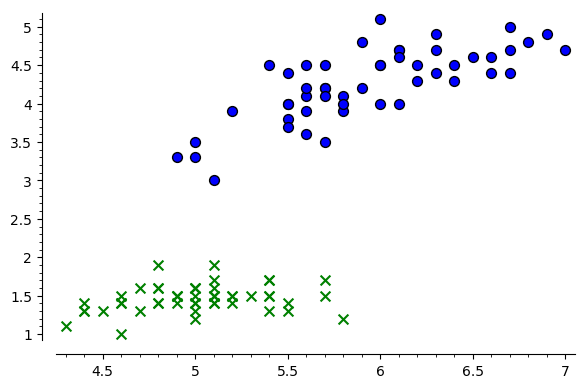

In [9]:
scatter_plot(X[0:50],marker='x', facecolor="green")+scatter_plot(X[50:], marker='o', facecolor="blue")

Możemy tutaj wyraźnie zauważyć, że irysy w wersji "setosa" (kolor zielony) są dobrze odseparowane od irysów w wersji "versicolor" (kolor niebieski)</br>
Teraz naspiszemy kilka funkcji, które będą miały za zadanie nauczyć nasz perceptron, jednak najpierw musimy zdefiniować listę wag, tablicę błędów oraz współczynnik uczenia.</br>
Te funkcje to:
* net_input() - odpowiada za obliczenie całkwitego pobudzenia
* fit() - odpowiada za uczenie
* predic() - odpowiada za przewidywanie klasy

Należy także wylosować początkowe wagi

In [10]:
w = []
errors = []
eta = 0.01
import random
for i in range(len(X[0]) + 1):
    w.append(random.random()-0.5)
print(w)

[-0.291548541309944, 0.315610228279375, 0.0399654042751854]


In [11]:
def net_input(X, w):
    z = []
    for i in range(len(X)):
        tmp = 0
        for j in range(2):
            tmp += X[i][j]*w[j+1]
        tmp += w[0]
        z.append(tmp)
    return z

In [12]:
def predict(X, w):
    phi = []
    z = net_input(X, w)
    for i in range(len(X)):
        if z[i] >= 0.0: 
            phi.append(1)
        else:
            phi.append(-1)
    return(phi)
        

In [13]:
def fit(X, y, w,errors, n_iter = 5, eta=0.01):
    for n in range(n_iter):
        y_pr = predict(X, w)
        error = 0
        for i in range(len(X)):
            update = eta*(y[i] - y_pr[i])
            for a in range(1,len(w)):
                w[a] += update*X[i][a-1]
            w[0] +=update
            error += int(update != 0.0)
        errors.append(error)
     

In [14]:
fit(X,y,w,errors)
errors


[50, 50, 50, 50, 50]

możemy zauważyć na liście errors, że już od pewnej epoki błedów nie ma i klasyfikaotr jest dobrze nauczony

Narysujemy wykres błędów w zależności od liczby epok 

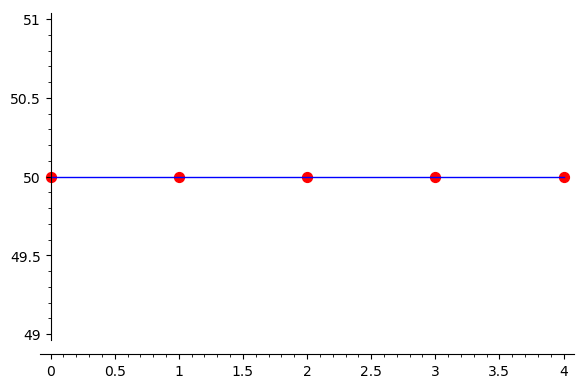

In [15]:
list_plot(errors, plotjoined=True) + list_plot(errors, faceted=True, color="red", size=50) 

Możemy łatwo zauważyć, 10 epok jest zupełnie wystarczajace do nauki tego preceptronu, ponieważ model osiaga zbieżnośc juz pod koniec.</br>
Teraz spróbujemt jeszcze przewidzieć dla przykładu dwie dane.

In [217]:
x = []
x.append([5.1, 1.4]) #powinno być 1
x.append([6.0, 4.0]) #powinno być -1
predict(x,w)

[1, 1]

Jak widzimy nasz model bardzo dobrze przewiduje nasz dane.</br>

Na koniec policzmy skuteczność naszego modelu:
Będzie to wartość $/frac{p}{q}$ gdzie $p$ - ilość dobrze przewidzianych etykiet a $q$ to ilosć wszystkich próbek

In [203]:
yp = predict(X,w)
p = 0
for i in range(len(yp)):
    if yp[i] == y[i]:
        p+=1
print("Skuteczność (w procentach): ")
(p/100.0)*100

Skuteczność (w procentach): 


100.000000000000